In [1]:
import matplotlib.pyplot as plt
from atomtoolkit import ureg, Q_, util, IO
import atomtoolkit.render.lineshapes as lineshapes
from atomtoolkit.atom import Atom, Transition
import atomtoolkit.render.grotrian as grt
import numpy as np
from pprint import pprint

pint
pint_pandas


In [2]:
a = Atom.load('species/Yb_II_173.atom')
a.B = Q_(5.0, 'G')

In [3]:
# plt.figure(figsize=(16, 16))
# grt.draw_levels(a)
# plt.show()

In [13]:
g = grt.Grotrian()
g.add_level(a.levels['4f14.6s 2S1/2'])
g.add_level(a.levels['4f13.(2F*).6s2 2F*7/2'], strategy=grt.hf_stack_level_table)
g.add_level(a.levels['4f14.5d 2D3/2'], strategy=grt.zeeman_level_table)
g.add_level(a.levels['4f14.5d 2D5/2'], strategy=grt.hf_offset_level_table)
g.add_level(a.levels['4f14.6p 2P*1/2'], strategy=grt.zeeman_level_table)

In [14]:
g.levels_df

,level,strategy,w,x1,x0,kwargs
0,"[F=2, F=3]",<function gross_structure_level_table at 0x169...,0.8,"(0, 0)",None,{}
1,"[F=1, F=2, F=3, F=4, F=5, F=6]",<function hf_stack_level_table at 0x16994a9d0>,0.8,"(0, 0)",None,{}
2,"[F=1, F=2, F=3, F=4]",<function zeeman_level_table at 0x16994aa60>,0.8,"(0, 0)",None,{}
3,"[F=0, F=1, F=2, F=3, F=4, F=5]",<function hf_offset_level_table at 0x16994aaf0>,0.8,"(0, 0)",None,{}
4,"[F=2, F=3]",<function zeeman_level_table at 0x16994aa60>,0.8,"(0, 0)",None,{}


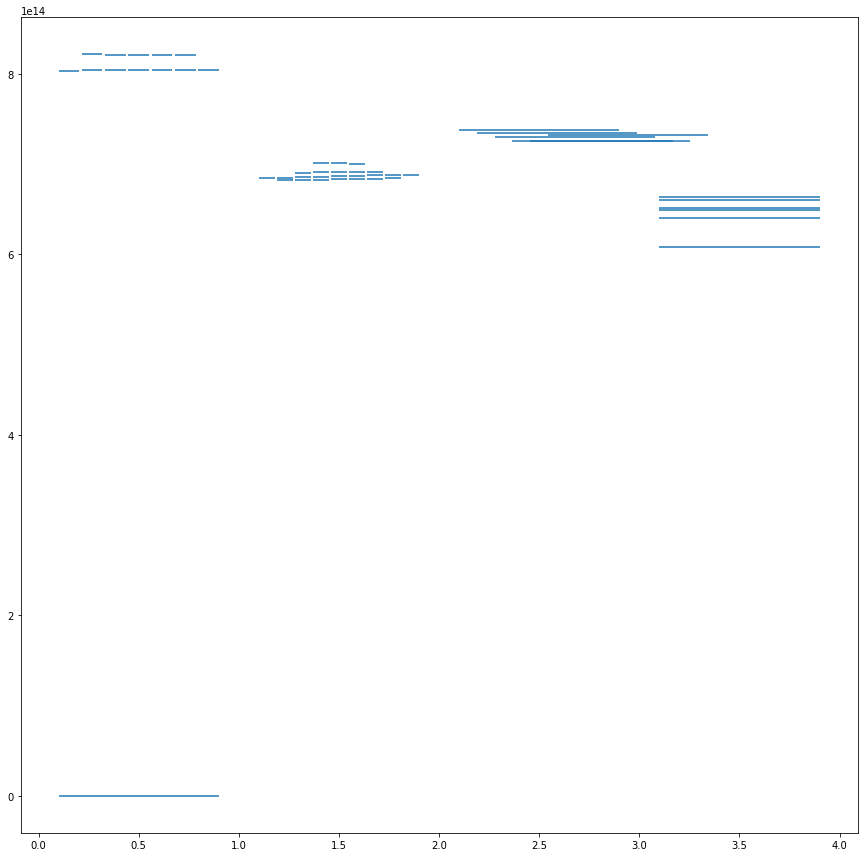

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))
grt.MPLGrotrianRenderer.render(g, ax)
ax.autoscale()
plt.show()

In [10]:
import pandas as pd
cols = ['p0', 'p1', 'kwargs']

# for i, row in g.levels_df.iterrows():
#     print(pd.DataFrame(data=row['strategy'](g, row['level']), columns=cols))
    
df = pd.DataFrame(columns=cols)
for i, row in g.levels_df.iterrows():
    df = pd.concat([df, pd.DataFrame(data=row['strategy'](g, row['level']), columns=cols)])
    
display(df)

print(list(zip(df['p0'].tolist(), df['p1'].tolist())))

,p0,p1,kwargs
0,"(0.09999999999999998, 0.0)","(0.9, 0.0)",{}
0,"(3.1, 640454841264464.2)","(3.9, 640454841264464.2)",{}
1,"(3.1, 650900274864464.2)","(3.9, 650900274864464.2)",{}
2,"(3.1, 660860652693035.8)","(3.9, 660860652693035.8)",{}
3,"(3.1, 663484650864464.2)","(3.9, 663484650864464.2)",{}
4,"(3.1, 649633842864464.2)","(3.9, 649633842864464.2)",{}
5,"(3.1, 607879846978750.0)","(3.9, 607879846978750.0)",{}
0,"(1.3666666666666667, 700798541964640.0)","(1.6333333333333333, 700798541964640.0)",{}
1,"(1.2777777777777777, 690981141964640.0)","(1.7222222222222223, 690981141964640.0)",{}
2,"(1.1888888888888889, 683390541964640.0)","(1.8111111111111111, 683390541964640.0)",{}


[((0.09999999999999998, 0.0), (0.9, 0.0)), ((3.1, 640454841264464.2), (3.9, 640454841264464.2)), ((3.1, 650900274864464.2), (3.9, 650900274864464.2)), ((3.1, 660860652693035.8), (3.9, 660860652693035.8)), ((3.1, 663484650864464.2), (3.9, 663484650864464.2)), ((3.1, 649633842864464.2), (3.9, 649633842864464.2)), ((3.1, 607879846978750.0), (3.9, 607879846978750.0)), ((1.3666666666666667, 700798541964640.0), (1.6333333333333333, 700798541964640.0)), ((1.2777777777777777, 690981141964640.0), (1.7222222222222223, 690981141964640.0)), ((1.1888888888888889, 683390541964640.0), (1.8111111111111111, 683390541964640.0)), ((1.1, 686589341964640.0), (1.9, 686589341964640.0)), ((2.1, 737505265000000.0), (2.9, 737505265000000.0)), ((2.8111111111111113, 734683005000000.0), (3.611111111111111, 734683005000000.0)), ((3.522222222222222, 730109845000000.0), (4.322222222222222, 730109845000000.0)), ((4.233333333333333, 725928505000000.0), (5.033333333333333, 725928505000000.0)), ((4.944444444444445, 72535

In [7]:
d = {'a': 1, 'b': 2}

SyntaxError: invalid syntax (4231487288.py, line 1)

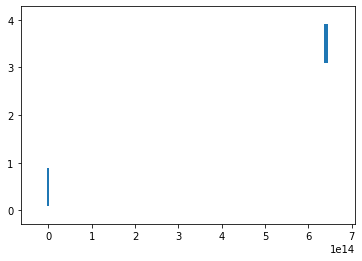

In [7]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

lines = [((0.0, 0.09999999999999998), (0.0, 0.9)), ((641951658007321.4, 3.1), (641951658007321.4, 3.9)), ((642996201367321.4, 3.1), (642996201367321.4, 3.9)), ((643992239150178.6, 3.1), (643992239150178.6, 3.9)), ((644254638967321.4, 3.1), (644254638967321.4, 3.9)), ((642869558167321.4, 3.1), (642869558167321.4, 3.9)), ((638694158578750.0, 3.1), (638694158578750.0, 3.9))]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

In [7]:
a.levels.list_names()

['4f14.6s 2S1/2',
 '4f13.(2F*).6s2 2F*7/2',
 '4f13.(2F*).6s2 2F*5/2',
 '4f14.5d 2D3/2',
 '4f14.5d 2D5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2',
 '4f14.6p 2P*1/2',
 '4f14.6p 2P*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*9/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*11/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[11/2]*13/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[5/2]*3/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*9/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[7/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*9/2',
 '4f13.(2F*<7/2>).5d.6s.(3D) 3[9/2]*11/2',
 '4f13.(2F*<7/2>).5d.6s.(1D) 1[3/2]*3/2',
 '4f13.(2F*<7/2>).5d.6s.(1D) 1[11/2]*11/2',
 '4f13.(2F*<7/2>).5d.6s.(1D) 1[5/2]*5/2',
 '4f13.(2F*<7/2>).5d.6s.(1D) 1[7/2]*7/2',
 '4f13.(2F*<7/2>).5d.6s.(1D) 1[9/2]*9/2',
 '4f13.(